# Kickstarter project

Analysis of key Kickstarter campaign indicators:
- Finding optimal campaign duration.
- Evaluating successful campaign categories.
- Finding an optimal time to launch a campaign.
- Inspecting pledged amount vs. funded percent.
- Inspecting the number of backers.

In [1]:
import numpy as np
import pandas as pd
import scipy as sp
from matplotlib import pyplot as plt

In [2]:
# Optional format change
# data = pd.read_excel('data.xlsx')
# data.to_csv('data.csv',index=False)

In [3]:
data = pd.read_csv('data.csv')

In [4]:
data

,project id,name,url,category,subcategory,location,status,goal,pledged,funded percentage,backers,funded date,levels,reward levels,updates,comments,duration
0,39409,WHILE THE TREES SLEEP,http://www.kickstarter.com/projects/emiliesaba...,Film & Video,Short Film,"Columbia, MO",successful,10500,11545.0,1.099524,66,"Fri, 19 Aug 2011 19:28:17 -0000",7,"$25,$50,$100,$250,$500,$1,000,$2,500",10,2,30.00
1,126581,Educational Online Trading Card Game,http://www.kickstarter.com/projects/972789543/...,Games,Board & Card Games,"Maplewood, NJ",failed,4000,20.0,0.005000,2,"Mon, 02 Aug 2010 03:59:00 -0000",5,"$1,$5,$10,$25,$50",6,0,47.18
2,138119,STRUM,http://www.kickstarter.com/projects/185476022/...,Film & Video,Animation,"Los Angeles, CA",live,20000,56.0,0.002800,3,"Fri, 08 Jun 2012 00:00:31 -0000",10,"$1,$10,$25,$40,$50,$100,$250,$1,000,$1,337,$9,001",1,0,28.00
3,237090,GETTING OVER - One son's search to finally kno...,http://www.kickstarter.com/projects/charnick/g...,Film & Video,Documentary,"Los Angeles, CA",successful,6000,6535.0,1.089167,100,"Sun, 08 Apr 2012 02:14:00 -0000",13,"$1,$10,$25,$30,$50,$75,$85,$100,$110,$250,$500...",4,0,32.22
4,246101,The Launch of FlyeGrlRoyalty &quot;The New Nam...,http://www.kickstarter.com/projects/flyegrlroy...,Fashion,Fashion,"Novi, MI",failed,3500,0.0,0.000000,0,"Wed, 01 Jun 2011 15:25:39 -0000",6,"$10,$25,$50,$100,$150,$250",2,0,30.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45952,2147336747,The Dance Project,http://www.kickstarter.com/projects/685772205/...,Dance,Dance,"Austin, TX",successful,500,601.0,1.202000,13,"Fri, 30 Mar 2012 13:57:00 -0000",3,"$20,$50,$100",2,0,37.83
45953,2147346811,new album from J-Sw!ft The Adventures of Negro...,http://www.kickstarter.com/projects/170926480/...,Music,Hip-Hop,"Los Angeles, CA",failed,10000,75.0,0.007500,2,"Sun, 22 Apr 2012 02:12:10 -0000",14,"$1,$5,$10,$25,$50,$50,$75,$100,$200,$250,$500,...",1,1,59.96
45954,2147367534,ELIZABETH REX,http://www.kickstarter.com/projects/elizabethr...,Music,Rock,"Los Angeles, CA",successful,10000,10000.0,1.000000,58,"Mon, 16 Jan 2012 05:00:00 -0000",4,"$10,$25,$100,$500",2,0,27.32
45955,2147369705,Dragon Keepers IV Book Project,http://www.kickstarter.com/projects/brucegoldw...,Publishing,Fiction,"Vero Beach, FL",failed,2999,257.0,0.085695,11,"Sat, 19 May 2012 19:44:47 -0000",7,"$15,$16,$19,$29,$29,$39,$75",17,0,30.00


In [5]:
mean_p = np.mean(data['pledged'])
print('Mean pledged:', mean_p, 'USD')

Mean pledged: 4980.749678963979 USD


## Finding optimal campaign duration

Let us have a look at the distribution of campaign durations.

Text(0, 0.5, 'Occurrence')

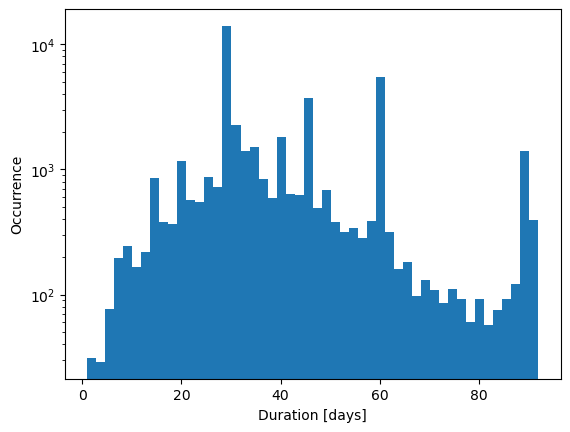

In [6]:
# Make histogram of duration
plt.hist(data['duration'].values, bins=50, log=True)
plt.xlabel('Duration [days]')
plt.ylabel('Occurrence')

In [7]:
skewness_duration = data['duration'].skew()
print('Duration skewness: ', skewness_duration)

Duration skewness:  1.0780267931867737


We may consider campaign duration "optimal" if it leads to a larger fraction of successful campaigns (funded by 100%). To identify fraction/frequency, we first discretize the values by making a histogram.

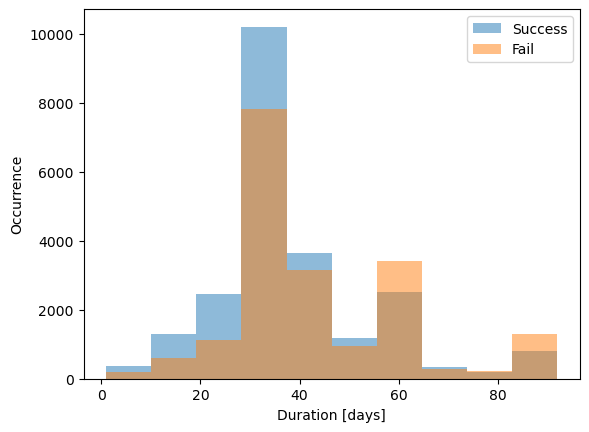

In [8]:
data_success = data.loc[data['status'] == 'successful']
data_failed = data.loc[data['status'] == 'failed']
ns, bs, _ = plt.hist(data_success['duration'], label='Success', alpha=0.5, bins=10)
nf, bf, _ = plt.hist(data_failed['duration'], label='Fail', alpha=0.5, bins=10)
plt.xlabel('Duration [days]')
plt.ylabel('Occurrence')
plt.legend()
ns = np.array(ns) # Number of successful campaigns per duration bin
nf = np.array(nf) # Number of failed campaigns per duration bin

From `plt.hist()`, we get values of histogram bins (`ns`, `nf`) corresponding to a number of successful and failed campaigns, respectively. We also get (`bs`, `bf`) corresponding to bin edges. It is convenient to convert bin edges to bin centers:

In [9]:
bs = [(bs[ii] + bs[ii-1])/2 for ii in range(1, len(bs))] 
bf = [(bf[ii] + bf[ii-1])/2 for ii in range(1, len(bf))]

Now, we can plot the fraction of successful and unsuccessful campaigns by binned duration.

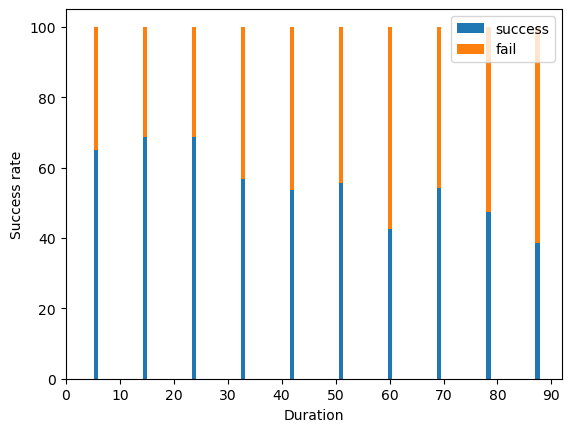

In [10]:
bottom = np.zeros(len(bs))
ns_fraction = ns / (ns + nf) * 100
_ = plt.bar(bs, ns_fraction, label='success')
bottom += ns_fraction
_ = plt.bar(bf, nf / (ns + nf) * 100, label='fail', bottom=bottom)
plt.xlabel('Duration')
plt.ylabel('Success rate')
plt.legend()
_ = plt.xticks([0,10,20,30,40,50,60,70,80,90])

**Conclusion:** From the plot above, it appears that campaign durations between 10-30 days are optimal.

----------------------------------------

## Successful campaign categories

Kickstarter campaigns fall into the following categories:

In [11]:
print(data.category.unique())

['Film & Video' 'Games' 'Fashion' 'Music' 'Art' 'Technology' 'Dance'
 'Publishing' 'Theater' 'Comics' 'Design' 'Photography' 'Food']


Below, we evaluate the fraction of successful campaigns in each category.

In [12]:
win_dict = {}
for ii, cat in enumerate(data.category.unique()):
    successful = len(data.loc[(data['category'] == cat) & (data['status'] == 'successful')].index)
    failed = len(data.loc[(data['category'] == cat) & (data['status'] == 'failed')].index)
    win_percent = successful / (successful + failed) * 100
    win_dict[cat] = win_percent

win_sorted = sorted(win_dict.items(), key=lambda x: x[1])

for element in win_sorted:
    print(element[0],'\t',element[1])

Fashion 	 32.87536800785084
Technology 	 39.21302578018996
Publishing 	 40.21660649819495
Games 	 43.28561690524881
Photography 	 46.50324441240086
Design 	 46.55172413793103
Food 	 50.462249614791986
Film & Video 	 50.996427153632396
Comics 	 53.71900826446281
Art 	 57.05770793822812
Music 	 67.56192181438377
Theater 	 70.71490094745909
Dance 	 74.54031117397454


**Conclusion:** The most successful campaign category is "Dance".

----------------------------------------

## Optimal time to launch a campaign

In [13]:
win_dict = {}
for month in ['Jan', 'Feb', 'Mar', 'Apr',
              'May', 'Jun', 'Jul', 'Aug',
              'Sep', 'Oct', 'Nov', 'Dec']:
    successful = len(data.loc[
                         (data['funded date'].str.contains(month)) &
                         (data['status'] == 'successful')].index)
    failed = len(data.loc[
                     (data['funded date'].str.contains(month)) &
                     (data['status'] == 'failed')].index)
    win_percent = successful/(successful+failed)*100
    win_dict[month] = win_percent

win_sorted = sorted(win_dict.items(), key=lambda x: x[1])

for element in win_sorted:
    print(element[0],'\t',element[1])

Dec 	 52.28857229463474
Jul 	 53.07341060765718
May 	 53.328661527680445
Jan 	 53.429951690821255
Jun 	 53.93258426966292
Sep 	 54.30127041742286
Feb 	 54.56232601299102
Oct 	 54.623348803998574
Aug 	 54.73061760840998
Mar 	 56.85457337135337
Apr 	 57.14007023019898
Nov 	 57.46212121212121


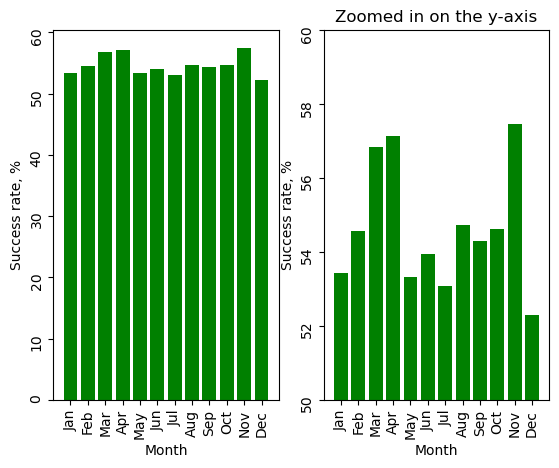

In [16]:
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.bar(win_dict.keys(), win_dict.values(), color='g')
ax2.bar(win_dict.keys(), win_dict.values(), color='g')
ax2.set_ylim([50,60])
ax1.set_xlabel('Month')
ax2.set_xlabel('Month')
ax1.set_ylabel('Success rate, %')
ax2.set_ylabel('Success rate, %')
ax2.set_title('Zoomed in on the y-axis')
_ = ax1.tick_params(rotation=90)
_ = ax2.tick_params(rotation=90)

**Conclusion:** There are slightly more successful campaigns (by a few percent) in November, April and March compared to other months. 

----------------------------------------

## Pledged vs. Funded percent

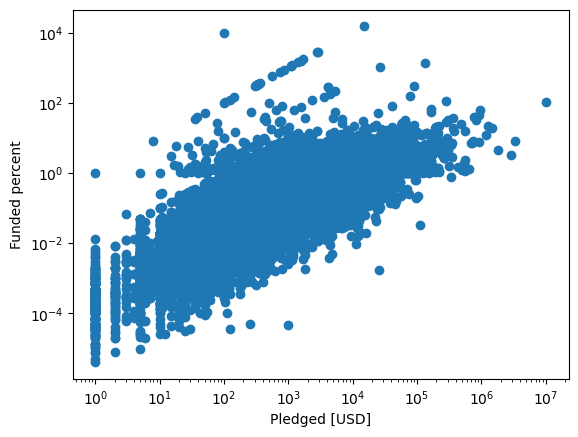

In [17]:
plt.scatter(data['pledged'], data['funded percentage'])
plt.xlabel('Pledged [USD]')
plt.ylabel('Funded percent')
plt.yscale('log')
plt.xscale('log')

## Number of backers

Text(0, 0.5, 'Occurrence')

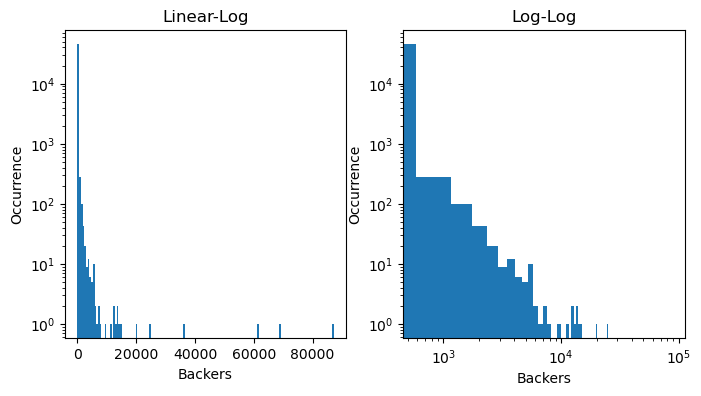

In [27]:
# Make histogram of a number of backers
#plt.hist(np.log10(data['backers'].values)[np.log10(data['backers'].values)!=-np.inf], bins=50)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))
ax1.hist(data['backers'].values, bins=150, log=True)
ax2.hist(data['backers'].values, bins=150, log=True)
ax1.set_title('Linear-Log')
ax2.set_title('Log-Log')
ax2.set_xscale('log')
ax1.set_xlabel('Backers')
ax1.set_ylabel('Occurrence')
ax2.set_xlabel('Backers')
ax2.set_ylabel('Occurrence')

In [28]:
skewness_backers = data['backers'].skew()
print('Backers skewness:', skewness_backers)

Backers skewness: 87.47397431084505
